In [1]:
df <- read.table("CPX_experiments.txt",sep="\t",header=TRUE)

Now you will choose an independent variable (X-variable) to fit to Pressure. You can also change whether the variables should be linear or nonlinear.

You can change the graphical plotting parameters using what you learnt earlier, and also using the following link: https://www.statmethods.net/advgraphs/parameters.html

You can also add parameters into your dataset that you might want to subset to better improve the model (V1, V2, ...)

Then fit a statistical model for the data and examine how well the model fits the data, using the R<sup>2</sup> value and the graph with the fitted line.

To export your graphs: Once you have run the code, right click on the graph and choose "Create New View for Output". a new window will appear and you will be able to right click on each graph and choose "Save image as". Once you have saved all graphs you can close the "Output View" window additional window.

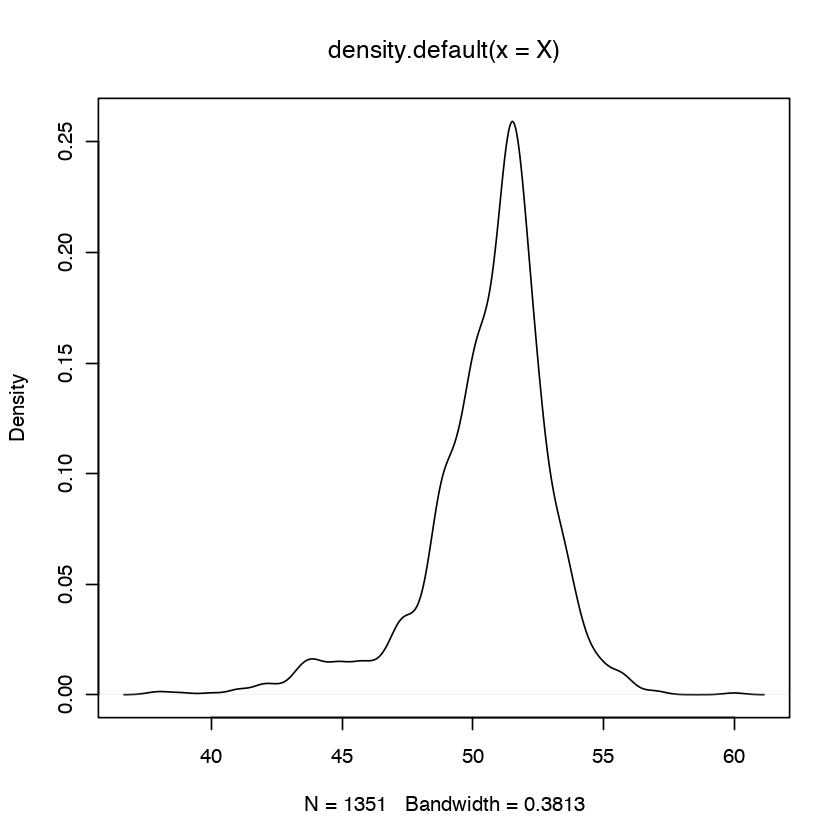

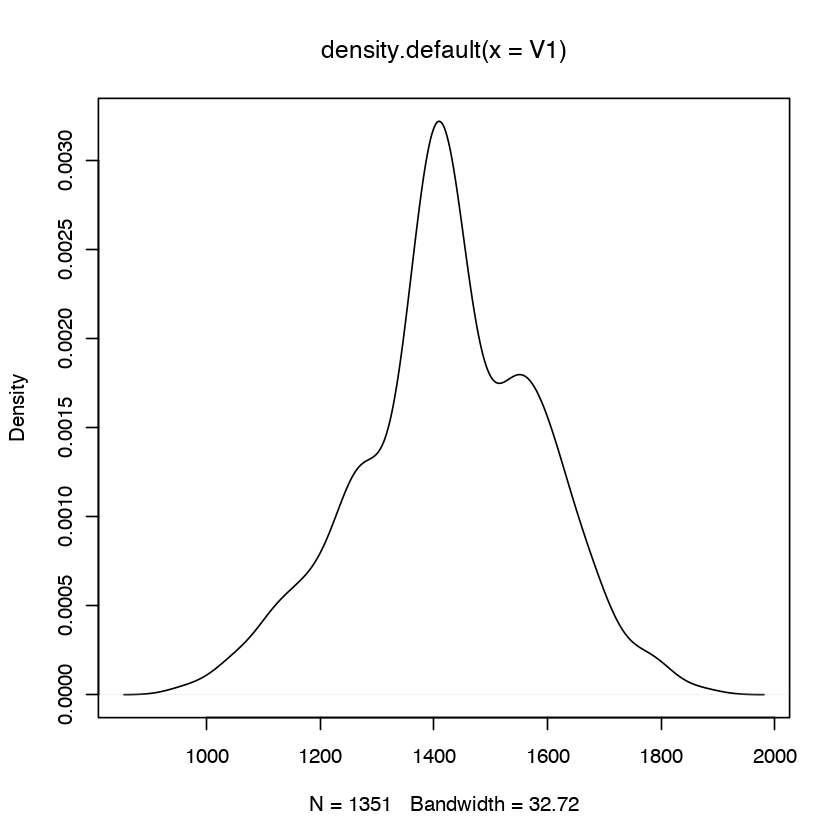

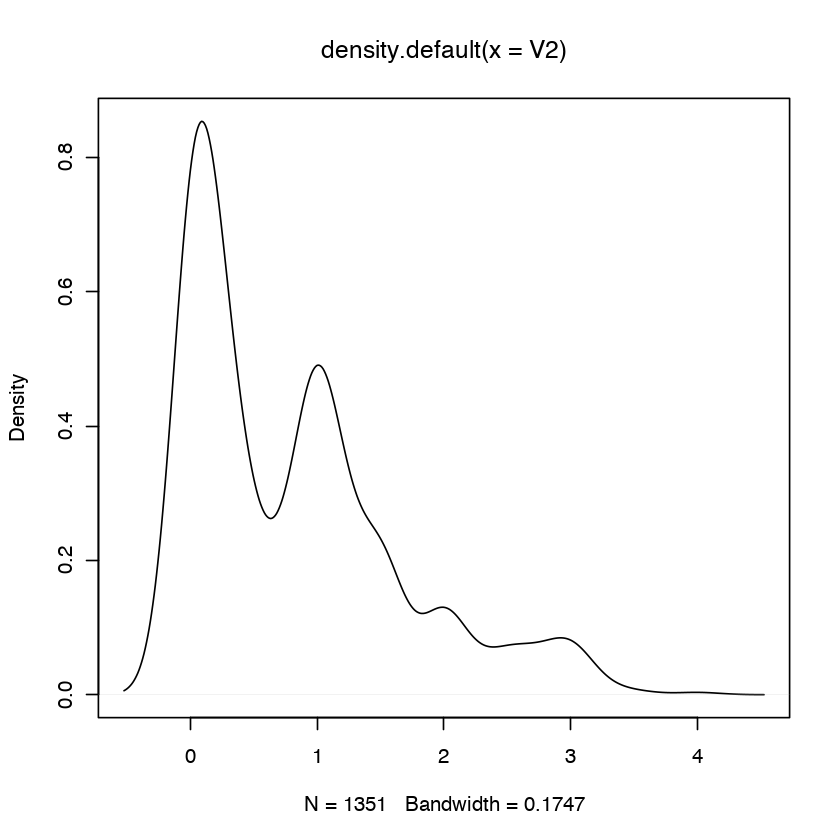

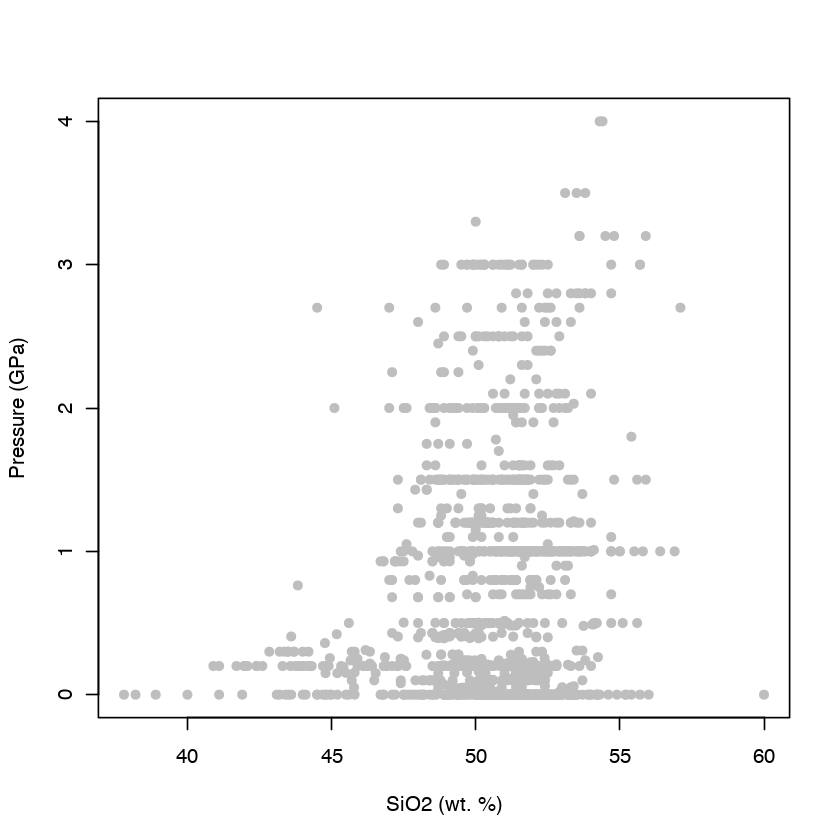

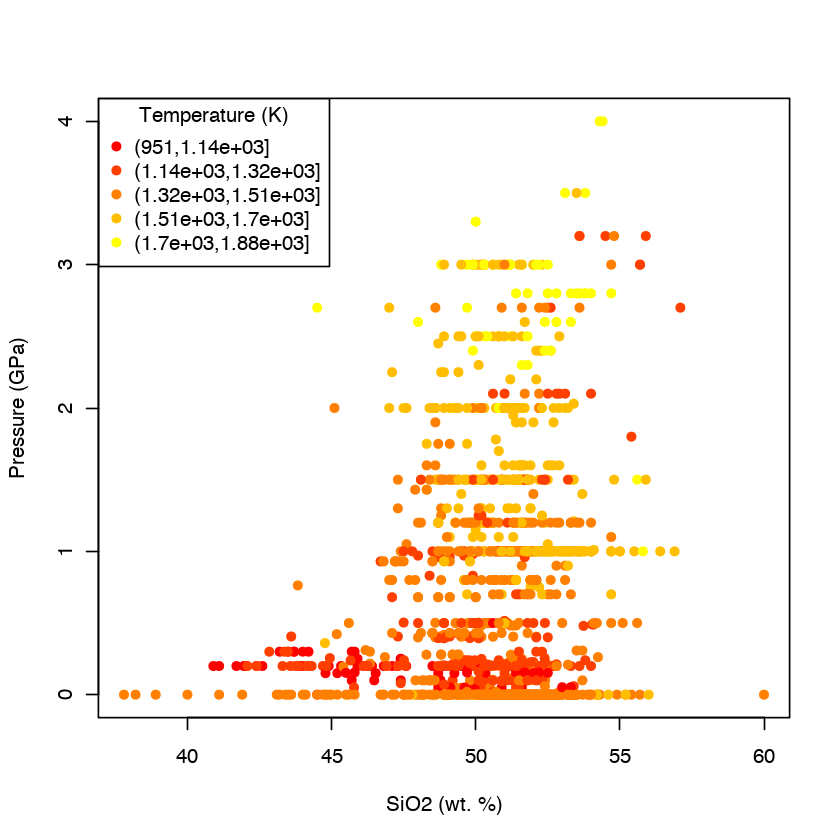

In [2]:
Y <- df$P_GPa
X <- df$SiO2.cpx
ylab <- "Pressure (GPa)"
xlab <- "SiO2 (wt. %)"

plot(density(X))

V1 <- df$T_K
V2 <- df$P_GPa

plot(density(V1))
plot(density(V2))

data <- data.frame(Y,X,V1,V2)

plot(data$X,data$Y,col="grey",pch=16,cex=1,xlab=xlab,ylab=ylab)

colourvar <- data$V1
colourvarname <- "Temperature (K)"
n.colours <- 5
pal <- colorRampPalette(c("red", "yellow"))
legend.position <- "topleft"

col.points <- pal(n.colours)[cut(colourvar,breaks = n.colours)] #do not change
plot(data$X,data$Y,col=col.points,pch=16,cex=1,xlab=xlab,ylab=ylab) #do not change
legend(legend.position,title = colourvarname,legend = levels(cut(colourvar,breaks = n.colours)),col = pal(n.colours), pch = 16) #do not change



If you want to subset the data edit the code in the box below and run the code. Otherwise ignore it.

In [3]:
ID <- which(data$V1 > 1300 & data$V2 > 1) #print(ID)
data <- data[ID,]


Call:
lm(formula = Y ~ X, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1040 -0.5397 -0.2390  0.5018  1.8722 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.60810    1.01613  -1.583 0.114402    
X            0.06880    0.01998   3.444 0.000641 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6409 on 358 degrees of freedom
Multiple R-squared:  0.03207,	Adjusted R-squared:  0.02936 
F-statistic: 11.86 on 1 and 358 DF,  p-value: 0.0006415


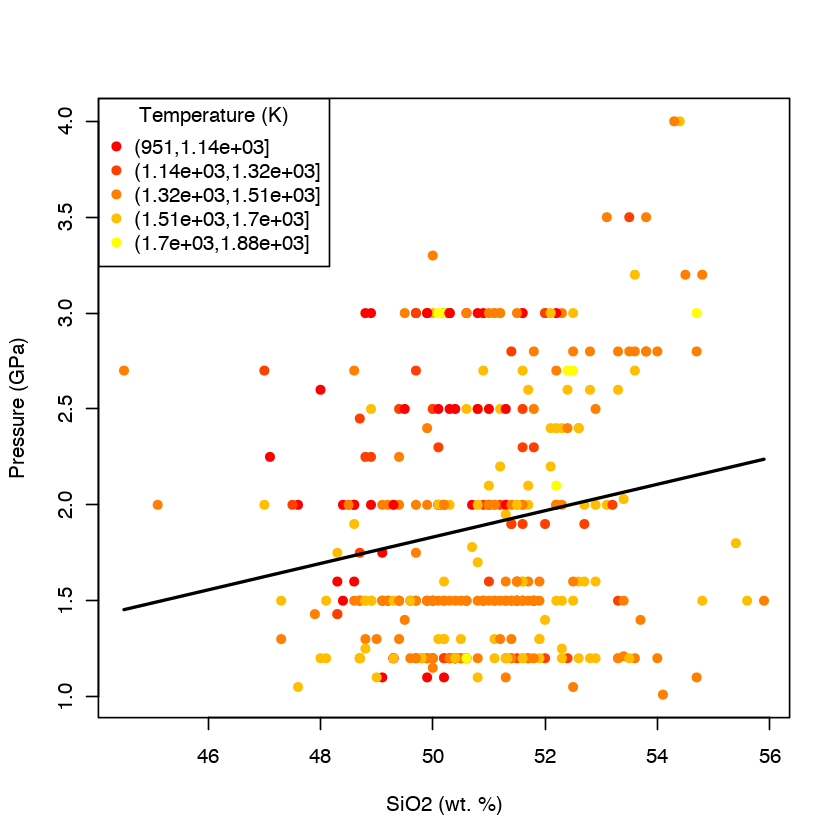

In [4]:
Model <- lm(Y ~ X, data=data)
summary(Model)

col.points <- pal(5)[cut(colourvar,breaks = 5)] #do not change
plot(data$X,data$Y,pch=16,col=col.points,cex=1,xlab=xlab,ylab=ylab) #do not change
lines(sort(data$X), fitted(Model)[order(data$X)], col="black", type='l',lwd=2) 
legend(legend.position,title = colourvarname,legend = levels(cut(colourvar,breaks = 5)),col = pal(5), pch = 16) #do not change


Now using the results of the regression above, predict the pressure that cpx crystallised in the magmatic system below Bardabunga:

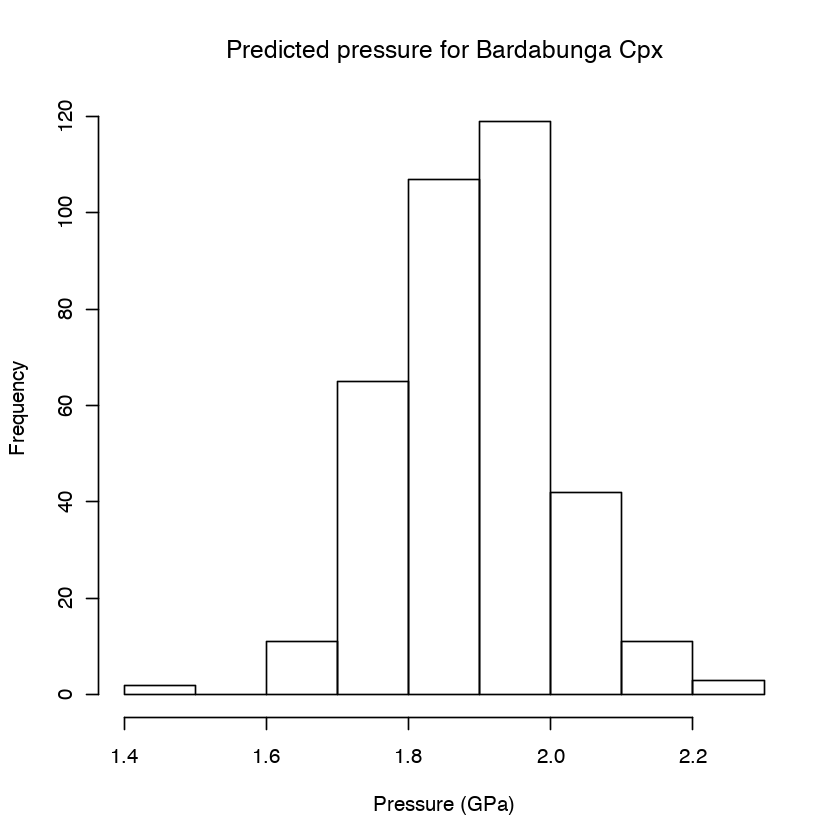

In [5]:
bardabunga <- read.table("cpx_bardabunga.txt",sep="\t",header=TRUE)

bardabunga.pressure <- predict(Model,X=bardabunga$SiO2)

hist(bardabunga.pressure,xlab="Pressure (GPa)",main="Predicted pressure for Bardabunga Cpx")